In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv(r'C:\Users\leandro.rocha.A1\PycharmProjects\Air_Passengers.csv')

In [26]:
df.shape

(139, 2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        139 non-null    object
 1   #Passengers  139 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [28]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [29]:
df.tail()

,Month,#Passengers
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622


In [30]:
df.describe().round(2)

,#Passengers
count,139.00
mean,273.14
std,115.01
min,104.00
25%,179.00
50%,259.00
75%,355.00
max,622.00


In [31]:
len_before = df.shape[0]
df.drop_duplicates(inplace=True)
len_after = df.shape[0]

print(f"Before = {len_before}")
print(f"After = {len_after}")
print("")
print(f"Total Removed = {len_before - len_after}")

Before = 139
After = 139

Total Removed = 0


In [32]:
def get_outliers(df):
    '''Identify the number of outliers +/- 3 standard deviations. 
    Pass this function a dataframe and it returns a dictionary'''

    outs = {}

    df = df.select_dtypes(include=['int64'])


    for col in df.columns:

        # calculate summary statistics
        data_mean, data_std = np.mean(df[col]), np.std(df[col])

        # identify outliers
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        # identify outliers
        outliers = [x for x in df[col] if x < lower or x > upper]

        outs[col] = len(outliers)

    return outs

In [33]:
get_outliers(df)

{'#Passengers': 1}

<AxesSubplot:>

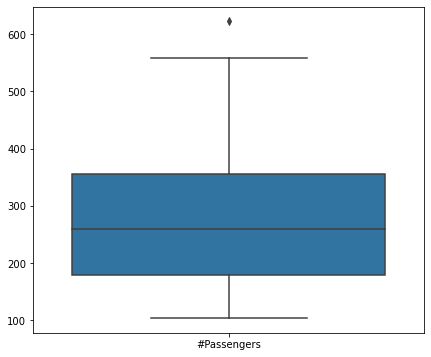

In [38]:
plt.figure(figsize=(7,6))
sns.boxplot( data=df, showfliers=True)

<AxesSubplot:ylabel='Count'>

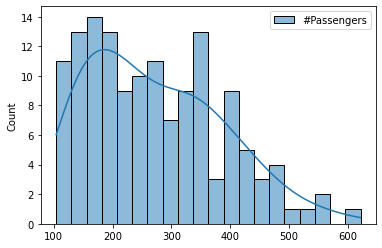

In [40]:
sns.histplot( data=df, bins=20, kde=True)

Text(0.5, 1.0, 'Pearson Correlation of Features')

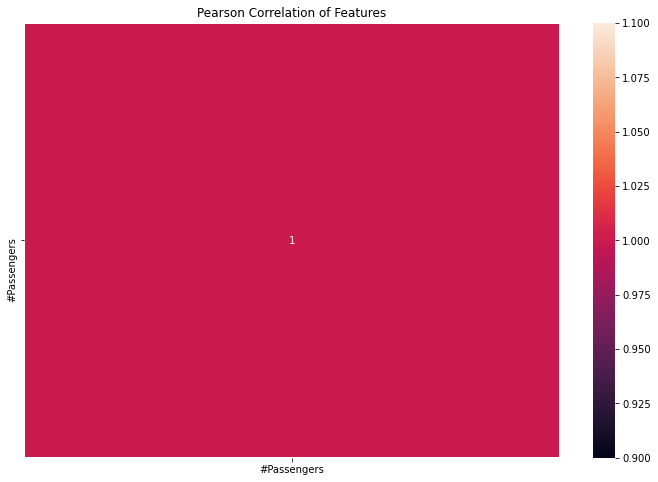

In [41]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, square=False, ax=ax, linewidth = 1)
plt.title('Pearson Correlation of Features')

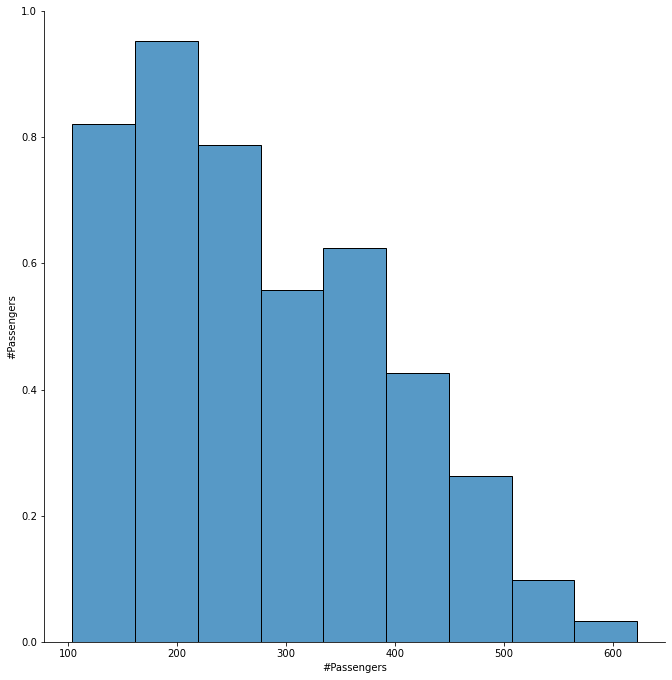

In [47]:

g=sns.pairplot(df, diag_kind = 'auto')
g.fig.set_size_inches(12,12)